<a href="https://colab.research.google.com/github/deborahmasibo/Moringa-Core-Module-2-Week-4-IP/blob/main/Naive_Bayes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Filtering

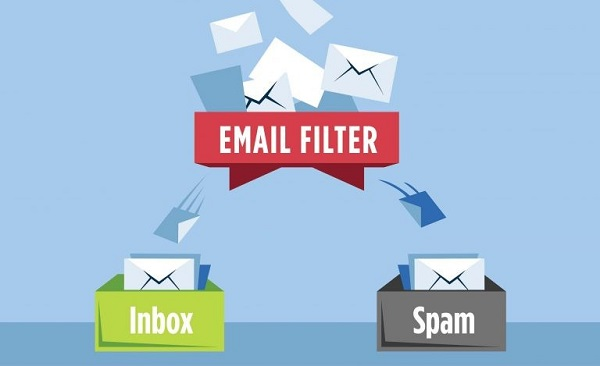

## 1. Defining the Question

### a) Specifying the Question

### b) Defining the Metric for Success

### c) Understanding the context 

### d) Recording the Experimental Design

The following list depicts the steps to be undertaken during the project.

1. Data sourcing/loading.
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preperation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Modeling

  a) KNN Classification

  b) Naive Bayes Classification

10. Implementing the solution
11. Challenging the solution
12. Conclusion
13. Follow up questions.


### e) Data Relevance

1. The data should have variables that adequately contribute to predicting the match results.
2. The dataset should lead to a high model fit (high accuracy, after all possible model optimization procedures have been applied.

## 2. Data Understanding

In [4]:
# Imports
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, f1_score, precision_score, recall_score, classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB, CategoricalNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os
# Using seaborn style defaults and setting the default figure size
sns.set(rc={'figure.figsize'(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [3]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Core/Machine Learning/Moringa Core Module 2 Week 4 IP/spambase')

Mounted at /content/drive


### a) Reading the Data

In [6]:
# Dataset loading
spam = pd.read_csv('spambase.data')

### b) Checking the Data

**Number of Records**

In [7]:
# Number of rows and columns
print(f'Spam dataset records= {spam.shape[0]} and columns = {spam.shape[1]}')

Spam dataset: records= 4600 and columns = 58


**Top Dataset Preview**

In [8]:
# First 5 records
spam.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


**Bottom Dataset Preview**

In [9]:
# Last 5 records
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


The initial preview does not reveal any anomalies.

### c) Checking Datatypes

In [10]:
# Dataset infromation
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

Datatypes are as required. Furthermore, there are no missing values.

## 3. External Dataset Validation 

## 4. Data Preperation

### a) Validation

All columns will be included as, from the data description, define word frequencies.

### b) Completeness

Confirming that missing values are not present.

**Percentage of missing values**

In [17]:
# Function to find the percentage of missing values
def PercentageMissing(data):
  # Precentage of missing values
  for col in data.columns.tolist():
    missing = data[col].isnull().sum()
    if missing > 0:
      print(f'{col} = {(missing/data.shape[0])*100}%')
    else:
      print('No missing values present')
      break

In [18]:
# Checking for misssing values
PercentageMissing(spam)

No missing values present.


### c) Consistency

In [19]:
# Checking for duplicates.
spam.duplicated().any().any()

True

In [22]:
# Percentage number of duplicates
print(f'Duplicates = {(spam.duplicated().sum()/spam.shape[0])* 100}%')

Duplicates = 8.5%


In [23]:
# Duplicates will be dropped
spam.drop_duplicates(inplace = True)

In [24]:
# Confirming changes have been implemented.
spam.duplicated().any().any()

False

There are no duplicates in the dataset.

### d) Uniformity

Checking uniformity of column names.

In [25]:
# Columns
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

Creating a dataset with added column names for further analysis.

In [35]:
# Column names
columns = """word_freq_make, word_freq_address, word_freq_all, word_freq_3d, 
word_freq_our, word_freq_over, word_freq_remove, word_freq_internet, 
word_freq_order, word_freq_mail, word_freq_receive, word_freq_will, 
word_freq_people, word_freq_report, word_freq_addresses, word_freq_free,
word_freq_business, word_freq_email, word_freq_you, word_freq_credit,
word_freq_your, word_freq_font, word_freq_000, word_freq_money, word_freq_hp,
word_freq_hpl, word_freq_george, word_freq_650, word_freq_lab, word_freq_labs,
word_freq_telnet, word_freq_857, word_freq_data,  word_freq_415, word_freq_85,
word_freq_technology, word_freq_1999, word_freq_parts, word_freq_pm,
word_freq_direct, word_freq_cs, word_freq_meeting, word_freq_original,
word_freq_project, word_freq_re, word_freq_edu, word_freq_table, 
word_freq_conference, char_freq_;, char_freq_(, char_freq_[, char_freq_!,
char_freq_$, char_freq_#,  capital_run_length_average,
capital_run_length_longest, capital_run_length_total, spam """

From the description, only the spm column is discrete.

In [27]:
# Copy of the dataset
spam_analysis = spam.copy()

In [36]:
# Splitting column names to a list
columns = columns.split(',')
type(columns)

list

In [37]:
# Comparing column name lengths
print(f'Dataset = {len(spam.columns)}')
print(f'Description = {len(columns)}')

Dataset = 58
Description = 58


Columns have the same length therefore, the columns names will be changes accordign to the columns provided and used for descriptive analysis.

In [39]:
# Changing column names
spam_analysis.columns = columns
# Confirming changes
spam_analysis.columns

Index(['word_freq_make', ' word_freq_address', ' word_freq_all',
       ' word_freq_3d', ' \nword_freq_our', ' word_freq_over',
       ' word_freq_remove', ' word_freq_internet', ' \nword_freq_order',
       ' word_freq_mail', ' word_freq_receive', ' word_freq_will',
       ' \nword_freq_people', ' word_freq_report', ' word_freq_addresses',
       ' word_freq_free', '\nword_freq_business', ' word_freq_email',
       ' word_freq_you', ' word_freq_credit', '\nword_freq_your',
       ' word_freq_font', ' word_freq_000', ' word_freq_money',
       ' word_freq_hp', '\nword_freq_hpl', ' word_freq_george',
       ' word_freq_650', ' word_freq_lab', ' word_freq_labs',
       '\nword_freq_telnet', ' word_freq_857', ' word_freq_data',
       '  word_freq_415', ' word_freq_85', '\nword_freq_technology',
       ' word_freq_1999', ' word_freq_parts', ' word_freq_pm',
       '\nword_freq_direct', ' word_freq_cs', ' word_freq_meeting',
       ' word_freq_original', '\nword_freq_project', ' word_freq_

In [53]:
# Dropping newline escape sequence and wite spaces in the column names
columns = [x.replace('\n', '').strip() for x in columns]
# Changing column names
spam_analysis.columns = columns
# Confirming changes
spam_analysis.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


All columns have the same case, therefore, they are uniform and no further editting is required.

### e) Outliers

Checking fot outliers.

In [54]:
# Outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [55]:
# Percentage number of outliers
outliers(spam)

Number of outliers = 4095
Percentage = 97.29151817533857%


Outliers form most of the dataset. This could be caused by the large number of words in the English (inferred from the column names) language, therefore, they will be retained.